<a href="https://colab.research.google.com/github/Dohy-Lee/ML_DL.Basic/blob/main/6_3)%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#6_2)에서의 과일사진은 10000개의 픽셀이 있기 때문에, 10000개의 특성이 있는 것임. 이러한 특성을 차원이라고도 함
#다차원 배열에서는 배열의 축 개수 = 차원. 1차원 배열, 즉 벡터는 원소의 개수 = 차원
#차원 축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고, 지도학습 모델의 성능을 향상시킬 수 있는 방법. 또한, 줄어든 차원에서 다시 원본차원으로 손실을 최대한 줄이면서 복원할 수 있음
#대표적인 차원 축소 알고리즘 : 주성분 분석(PCA)
#주성분 : 분산이 큰 방향(데이터의 분포를 가장 잘 표현하는 방향)을 원점에서 출발시킨 벡터. 원본 차원과 같고, 주성분을 이용해 바꾼 데이터는 차원이 줄어듦. 일반적으로 원본 특성의 개수만큼 찾을 수 있음
#주성분은 원본 데이터에 있는 어떤 방향. 따라서 주성분 벡터의 원소 개수 = 원본 데이터셋에 있는 특성 개수
#두 번째 주성분 : 이 벡터에 수직이고 분산이 가장 큰 다음 방향

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-05-06 18:24:31--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-06 18:24:32--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-06 18:24:32--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
pca = PCA(n_components=50) #n_components : 주성분의 개수
pca.fit(fruits_2d) #K-Means Algorithm과 같이 비지도이기에 타겟데이터는 필요없음
print(pca.components_.shape) #첫 번째 차원 : 50 (=n_components), 두 번째 차원 : '항상' 원본 데이터의 특성 개수와 같음

(50, 10000)


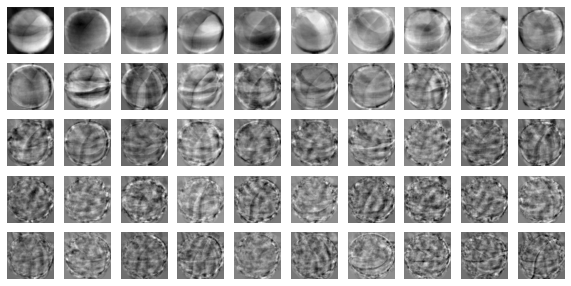

In [ ]:
def draw_fruits(arr, ratio = 1): #각 클러스터(레이블0~2)가 어떤 이미지를 표현하고있는지 이미지를 출력하는 함수, ratio에 비례하여 figsize가 커진다.
    n = len(arr) #n : 샘플의 개수
    #한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10)) #np.ceil : 입력한 값과 같거나 큰 정수중 가장 가까운 정수 값
    #행이 1개이면 열의 개수는 샘플의 개수, 그렇지않다면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i  in range(rows):
      for j in range(cols):
        if i * 10 + j < n : #n개까지만 그림
            axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
        axs[i,j].axis('off')
    plt.show()
draw_fruits(pca.components_.reshape(-1,100,100)) #해당 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것/데이터셋에 있는 어떤 특징을 잡아낸 것

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d) #원본데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄임(=원본 데이터를 각 주성분으로 분해하는 것)
print(fruits_pca.shape)

(300, 50)


In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca) #inverse_transform : 원본 데이터를 재구성
print(fruits_inverse.shape)

(300, 10000)


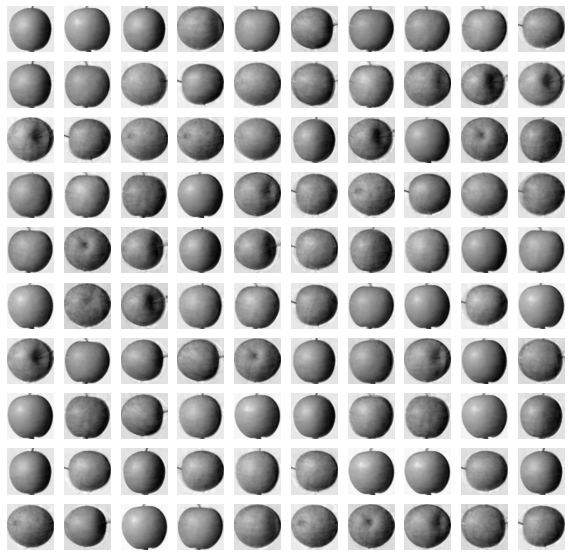

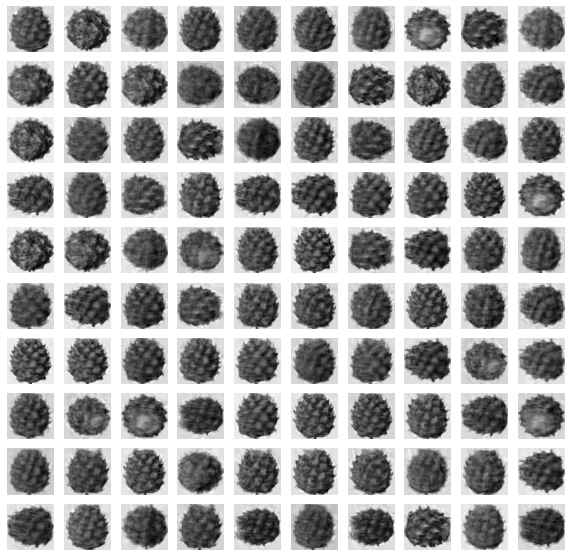

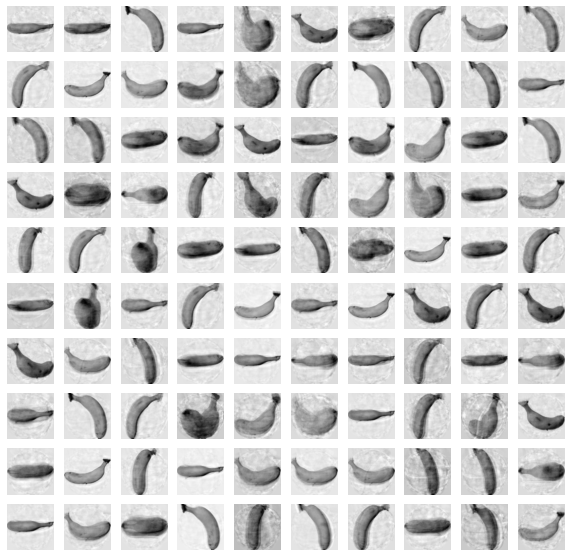

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [ ]:
#설멷된 분산 : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값 PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있음
print(np.sum(pca.explained_variance_ratio_)) #약 92% 분산을 유지

0.9214273467472412


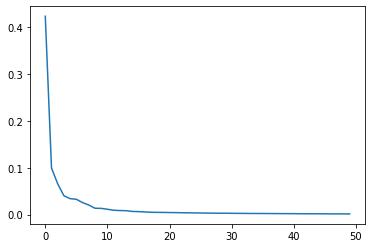

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
#Logistic Regression + PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate #교차검증
lr = LogisticRegression()
#타깃 데이터 : 사과(0),파인애플(1),바나나(2)
target = np.array([0]*100+[1]*100+[2]*100)
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))#PCA전 정확도 99, 훈련시간 1.493

0.9966666666666667
1.4622044563293457


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) #PCA후(특성 50개) 정확도 100, 훈련시간 0.03

1.0
0.03818378448486328


In [ ]:
pca = PCA(n_components=0.5) #주성분 개수 대신 설명된 분산의 비율(0~1)을 입력할 수 있음
pca.fit(fruits_2d)
print(pca.n_components_)#몇 개의 주성분을 찾았는지 출력 →2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있음

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) #PCA후(특성 2개) 정확도 0.99, 훈련시간 0.05

(300, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9933333333333334
0.05332241058349609


In [ ]:
#K-means Algorithm + PCA
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


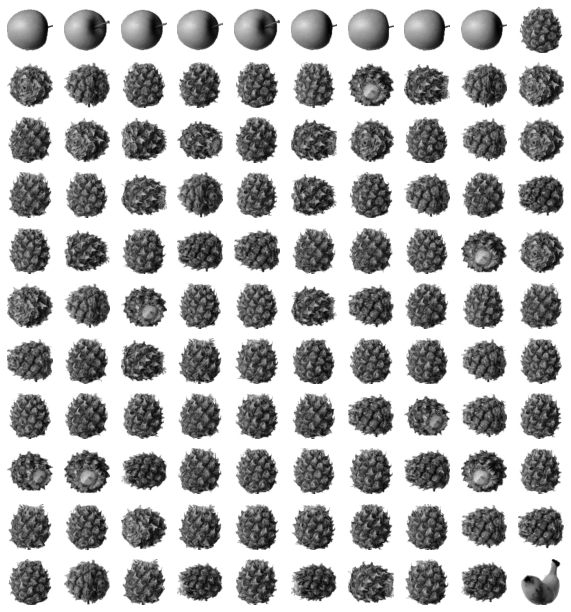

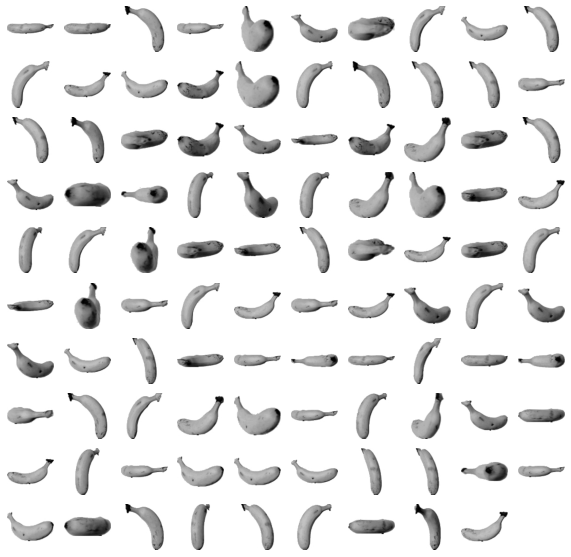

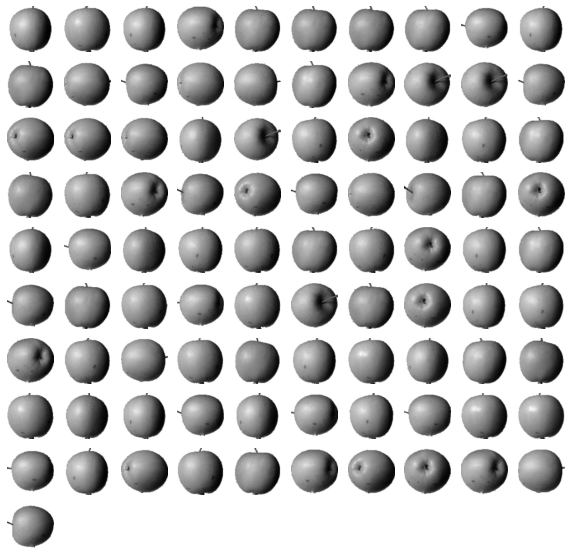

In [ ]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_== label])
  print('\n')

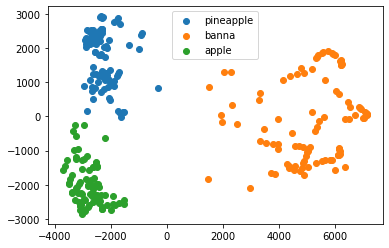

In [ ]:
#훈련 데이터의 차원을 줄이면 시각화하기 쉬워짐
for label in range(3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple','banna','apple'])
plt.show() #사과와 파인애플의 경계가 가깝게 붙어 있음 -> 위 사진에서 파인애플 클러스터에 사과가 있는 이유를 알 수 있음